In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Import dataframes
folder = "../estimates"
df = pd.read_csv(f"{folder}/estimates.csv")
df_invariant = pd.read_csv(f"{folder}/estimated_parameters_invariant_allPPs.csv")
df_variance = pd.read_csv(f"{folder}/estimates_control-variance.csv")
df_linear_narrow = pd.read_csv(f"{folder}/estimates_linear.csv")
df_linear_broad = pd.read_csv(f"{folder}/estimates_linear_broad.csv")
df_exponential_narrow = pd.read_csv(f"{folder}/estimates_exponential.csv")
df_exponential_broad = pd.read_csv(f"{folder}/estimates_exponential_broad.csv")
df_jump_narrow = pd.read_csv(f"{folder}/estimates_jumpreward.csv")
df_jump_broad = pd.read_csv(f"{folder}/estimates_reward_broad.csv")

# Rename columns in df_invariant for clarity
df_invariant.rename(columns={
    "optimal_NLL": "NLL",
    "beta_e": "beta",
    "tau_e": "tau",
    "l_fit_e": "l_fit"}, inplace=True)

In [13]:
nll_model_invariant = np.sum(df_invariant['NLL'])  # Sum model NLL per participant
nll_model_variance = np.sum(df_variance['NLL'])  # Sum model NLL per participant
nll_model_linear = np.sum(df_linear_narrow['NLL'])  # Sum model NLL per participant
nll_model_linear_broad = np.sum(df_linear_broad['NLL'])  # Sum model NLL per participant
nll_model_exponential = np.sum(df_exponential_narrow['NLL'])  # Sum model NLL per participant
nll_model_exponential_broad = np.sum(df_exponential_broad['NLL'])  # Sum model NLL per participant
nll_model_jump = np.sum(df_jump_narrow['NLL'])  # Sum model NLL per participant
nll_model_jump_broad = np.sum(df_jump_broad['NLL'])  # Sum model NLL per participant

models = [
    nll_model_invariant,
    nll_model_variance,
    nll_model_linear,
    nll_model_linear_broad,
    nll_model_exponential,
    nll_model_exponential_broad,
    nll_model_jump,
    nll_model_jump_broad
]

model_names = [
    "Invariant",
    "Variance",
    "Linear Narrow",
    "Linear Broad",
    "Exponential Narrow",
    "Exponential Broad",
    "Jump Narrow",
    "Jump Broad"
]

nll_random = ((-np.log(1 / 121)) * 250) * df_invariant.shape[0] # Random NLL Sum

for model in models:
    pseudo_r2 = 1 - (model / nll_random)
    print(f"Model: {model_names[models.index(model)]}")
    print(f"Pseudo R2: {pseudo_r2:.4f}")
    print('Model:', model)

Model: Invariant
Pseudo R2: 0.3443
Model: 401721.78974490345
Model: Variance
Pseudo R2: 0.3396
Model: 404590.12731675024
Model: Linear Narrow
Pseudo R2: 0.3431
Model: 402444.44067074556
Model: Linear Broad
Pseudo R2: 0.3422
Model: 403009.7948583956
Model: Exponential Narrow
Pseudo R2: 0.3399
Model: 404416.5788993742
Model: Exponential Broad
Pseudo R2: 0.3420
Model: 403106.0512481511
Model: Jump Narrow
Pseudo R2: 0.3416
Model: 403405.623255238
Model: Jump Broad
Pseudo R2: 0.3428
Model: 402636.44663559354


/var/folders/w4/tq7bwnc55fq0szys00nlv29w0000gn/T/ipykernel_12938/1430952962.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df_invariant['NLL'], df_variance['NLL'], df_linear_narrow['NLL'], df_linear_broad['NLL'], df_exponential_narrow['NLL'], df_exponential_broad['NLL'], df_jump_narrow['NLL'], df_jump_broad['NLL']],


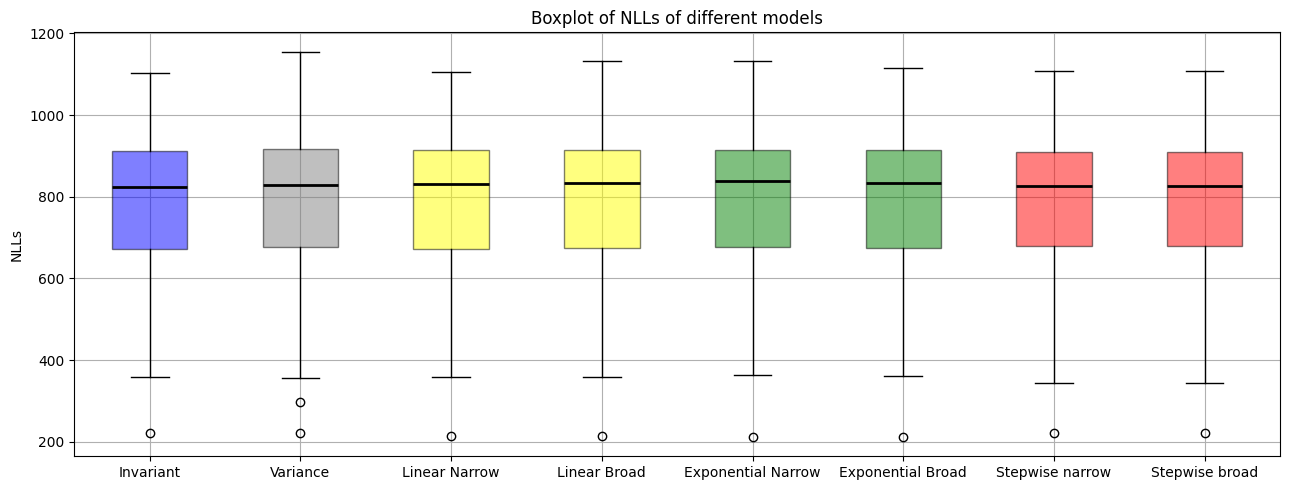

In [15]:
# Boxplot the NLLs of the different models, give each model a different color
labels = ['Invariant', 'Variance', 'Linear Narrow', 'Linear Broad', 'Exponential Narrow', 'Exponential Broad', 'Stepwise narrow', 'Stepwise broad']
colors = ['blue', 'grey', 'yellow', 'yellow', 'green', 'green', 'red', 'red']

plt.figure(figsize=(13, 5))
box = plt.boxplot([df_invariant['NLL'], df_variance['NLL'], df_linear_narrow['NLL'], df_linear_broad['NLL'], df_exponential_narrow['NLL'], df_exponential_broad['NLL'], df_jump_narrow['NLL'], df_jump_broad['NLL']],
                    labels=labels,
                    patch_artist=True,
)
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_alpha(0.5)

for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(2)
    
plt.ylabel('NLLs')
plt.title('Boxplot of NLLs of different models')
plt.grid(True)
plt.tight_layout()
plt.show()

Best Model
Stepwise narrow       183
Variance               91
Stepwise broad         68
Invariant              64
Exponential Narrow     47
Linear Narrow          28
Linear Broad           20
Exponential Broad      10
Name: count, dtype: int64


/var/folders/w4/tq7bwnc55fq0szys00nlv29w0000gn/T/ipykernel_12938/2128474872.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_model_counts.index, y=best_model_counts.values, palette=colors)


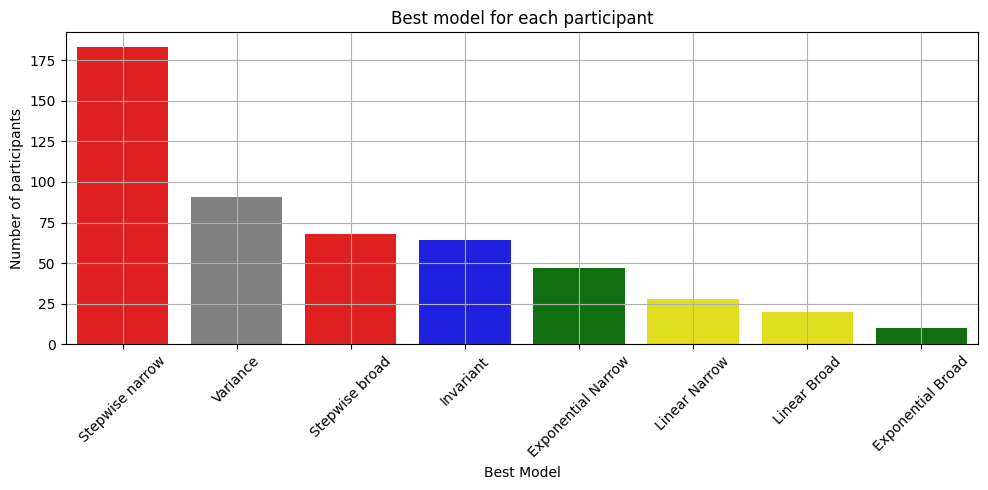

In [16]:
# Which model is better for each participant?
# Make a dataframe with the NLLs of each model for each participant
df_nll = pd.DataFrame({
    'Invariant': df_invariant['NLL'],
    'Variance': df_variance['NLL'],
    'Linear Narrow': df_linear_narrow['NLL'],
    'Linear Broad': df_linear_broad['NLL'],
    'Exponential Narrow': df_exponential_narrow['NLL'],
    'Exponential Broad': df_exponential_broad['NLL'],
    'Stepwise narrow': df_jump_narrow['NLL'],
    'Stepwise broad': df_jump_broad['NLL'],
})

df_nll['Best Model'] = df_nll.idxmin(axis=1)  # Get the best model for each participant

best_model_counts = df_nll['Best Model'].value_counts()  # Count the number of participants for each model
print(best_model_counts)

colors = ['red', 'grey', 'red', 'blue', 'green', 'yellow', 'yellow', 'green']

# Make a barplot of the best model counts
plt.figure(figsize=(10, 5))
sns.barplot(x=best_model_counts.index, y=best_model_counts.values, palette=colors)
plt.ylabel('Number of participants')
plt.title('Best model for each participant')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot the NLLs of the different models, give each model a different color
labels = ['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(8, 5))
plt.boxplot([df_invariant['beta_e'], df_variance['beta'],df_linear_narrow['beta'], df_exponential_narrow['beta'], 
             df_jump_narrow['beta']],
            labels=['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise'])
plt.ylabel('Beta (β)')
plt.title('Beta (β) distributions of different models')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot the NLLs of the different models, give each model a different color
labels = ['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(8, 5))
plt.boxplot([df_invariant['tau_e'], df_variance['tau'],df_linear_narrow['tau'], df_exponential_narrow['tau'], 
             df_jump_narrow['tau']],
            labels=['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise'])
plt.ylabel('Tau (τ)')
plt.title('Tau (τ) distributions of different models')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot the NLLs of the different models, give each model a different color
labels = ['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(8, 5))
plt.boxplot([df_invariant['l_fit_e'], df_variance['l_fit'],df_linear_narrow['l_fit'], df_exponential_narrow['l_fit'], 
             df_jump_narrow['l_fit']],
            labels=['Invariant', 'Variance', 'Linear', 'Exponential', 'Stepwise'])
plt.ylabel('Lambda (λ)')
plt.title('Lambda (λ) distributions of different models')
plt.grid(True)
plt.tight_layout()
plt.show()



Tukey's Fence and Median Values for Parameters:
beta: -1.3852 – 2.5017
beta median: 0.3267
tau: 0.0243 – 0.0930
tau median: 0.0603
l_fit: -14.1469 – 32.5746
l_fit median: 11.3024
